In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
colors={
    'GTCNN': "forestgreen",
    'LSTM': "goldenrod",
    'GGRNN': "darkred",
    'Random': "fuchsia"
}

In [3]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
    
def parse_results(path, cat, metric):
    result_dict = {}

    for folder in os.listdir(path):
        folder_for_class = os.path.join(path, folder)
        experiment_class = folder.split("=")[1]
        experiment_folders = os.listdir(folder_for_class)
        assert len(experiment_folders) == 20

        class_experiment_dicts = []

        for f in experiment_folders:
            exp_folder = os.path.join(folder_for_class, f)

            experiment_dict = {}
            for category in ['best', 'last']:
                cm = np.load(os.path.join(exp_folder, f'cm_tst_{category}.npy'))
                TN, FP, FN, TP = cm.ravel()

                recall = TP/(TP+FN) if (TP+FN != 0) else 0
                precision = TP/(TP+FP)  if (TP+FP != 0) else 0
                accuracy = (TP+TN)/(TP+FP+FN+TN) if (TP+FP+FN+TN != 0) else 0
                f1 = (2 * (precision * recall) / (precision + recall)) if (precision + recall != 0) else 0

                experiment_dict[category] = {
                    'recall': recall,
                    'precision': precision,
                    'accuracy': accuracy,
                    'f1': f1,
                    'cm': cm
                }


            class_experiment_dicts.append(experiment_dict)


        result_dict[int(experiment_class)] = class_experiment_dicts
        
    result = {}
    for class_index in sorted(result_dict.keys()):
        class_dicts_list = result_dict[class_index]
        assert len(class_dicts_list) == 20

        values = [class_dict[cat][metric] for class_dict in class_dicts_list]
        result[class_index] = values
    return result

------------------------

------------------------

------------------------

# Result reader

In [4]:
GTCNN_results_folder = r"C:\Users\gabri\Desktop\exp_earthquakes\OAA\runs_tmp\runs_GTCNN_w=20_OAA"
LSTM_results_folder = r"C:\Users\gabri\Desktop\exp_earthquakes\OAA\runs_1\runs_LSTM_w=20_OAA"
GRNN_results_folder = r"C:\Users\gabri\Desktop\exp_earthquakes\OAA\grnn\runs_GRNN_w=20_OAA"

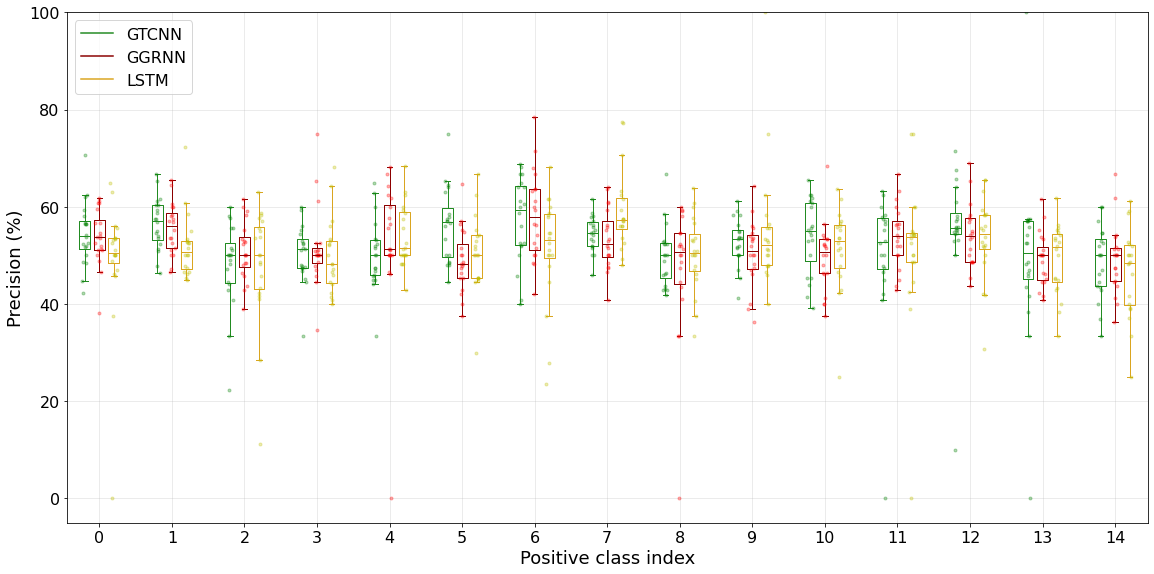

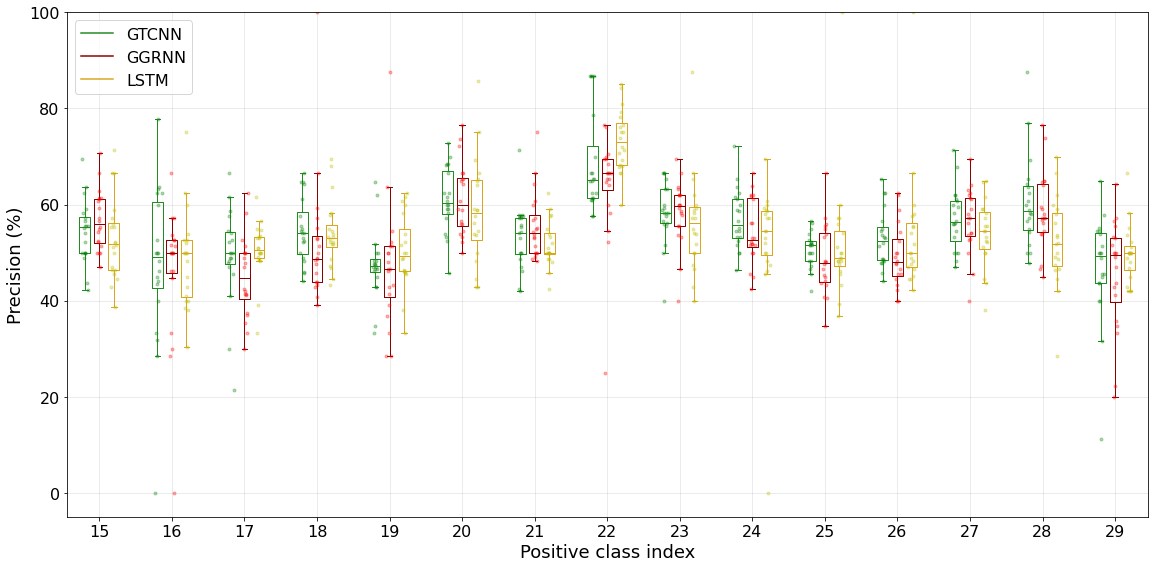

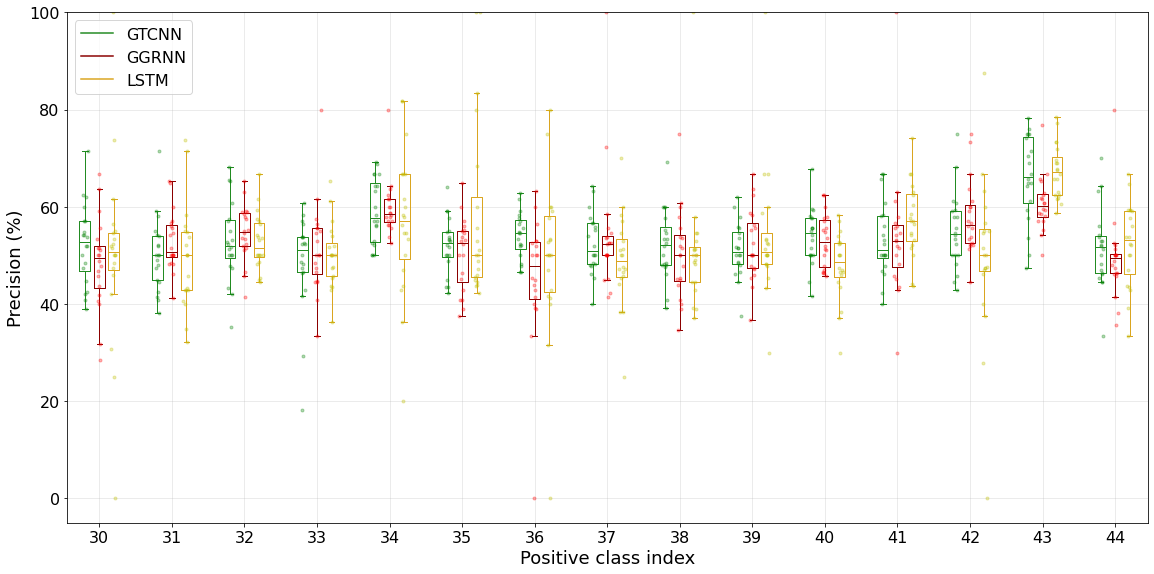

0.53617
0.52788


In [15]:
METRIC = 'precision' # accuracy, recall, precision, f1
CATEGORY = 'best' # best, last

GTCNN_results = parse_results(GTCNN_results_folder, CATEGORY, METRIC)
LSTM_results = parse_results(LSTM_results_folder, CATEGORY, METRIC)
GRNN_results = parse_results(GRNN_results_folder, CATEGORY, METRIC)

# plot
for start, end in [(0, 15), (15, 30), (30, 45)]:

    boxprops = dict(linewidth=1.5)
    
    data_GTCNN = (np.array(list(GTCNN_results.values())[start:end])*100).tolist()
    data_LSTM = (np.array(list(LSTM_results.values())[start:end])*100).tolist()
    data_GRNN = (np.array(list(GRNN_results.values())[start:end])*100).tolist()
    
    ticks = [str(k) for k in GTCNN_results][start:end]

    plt.figure(figsize=(16, 8))

    boxprops = dict(linewidth=1)
    
    distancing = 2

    b_GTCNN = plt.boxplot(data_GTCNN, positions=np.array(range(len(data_GTCNN)))*distancing-0.4, sym='', widths=0.3, boxprops=boxprops)
    b_GRNN = plt.boxplot(data_GRNN, positions=np.array(range(len(data_GRNN)))*distancing, sym='', widths=0.3, boxprops=boxprops)
    b_LSTM = plt.boxplot(data_LSTM, positions=np.array(range(len(data_LSTM)))*distancing+0.4, sym='', widths=0.3, boxprops=boxprops)


    set_box_color(b_GTCNN, colors['GTCNN']) # colors are from http://colorbrewer2.org/
    set_box_color(b_GRNN, colors['GGRNN'])
    set_box_color(b_LSTM, colors['LSTM'])

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c=colors['GTCNN'], label=r'GTCNN')
    plt.plot([], c=colors['GGRNN'], label=r'GGRNN')
    plt.plot([], c=colors['LSTM'], label=r'LSTM')
    

    
    plt.xticks(range(0, len(ticks) * distancing, distancing), ticks,fontsize=16)
    plt.ylabel(f"{METRIC.title()} (%)", fontsize=18)
    plt.xlabel(r'Positive class index', fontsize=18)
    plt.yticks(fontsize=16)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    if METRIC == 'accuracy':
        plt.ylim(20, 85)
        plt.legend(fontsize=16, loc="upper left")
    elif METRIC == 'recall':
        plt.ylim(-5, 120)
        plt.legend(fontsize=16, loc="upper left")
    else:
        plt.ylim(-5, 100)
        plt.legend(fontsize=16, loc="upper left")
    
    for i in range(0, 15):
        alpha = 0.3
        plt.plot(np.random.normal(i*distancing - 0.4 , 0.04, size=len(data_GTCNN[i])), data_GTCNN[i], 'g.', alpha=alpha)
        plt.plot(np.random.normal(i*distancing, 0.04, size=len(data_GRNN[i])), data_GRNN[i], 'r.', alpha=alpha)
        plt.plot(np.random.normal(i*distancing + 0.4 , 0.04, size=len(data_LSTM[i])), data_LSTM[i], 'y.', alpha=alpha)

    plt.savefig(f"OAA_boxplots_{start}_to_{end}_{METRIC}.pdf")
    plt.show()


print(round(np.average(np.mean(np.array([v for k,v in GTCNN_results.items()]), axis=1)), 5))
print(round(np.average(np.mean(np.array([v for k,v in LSTM_results.items()]), axis=1)), 5))



GTCNN | best | average accuracy | --> 0.536 (0.04)
LSTM | best | average accuracy | --> 0.524 (0.045)
Gap: 1.2
GTCNN > LSTM 32 times out of 45


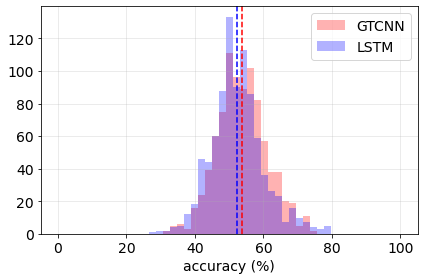



GTCNN | best | average precision | --> 0.536 (0.045)
LSTM | best | average precision | --> 0.528 (0.048)
Gap: 0.8
GTCNN > LSTM 26 times out of 45


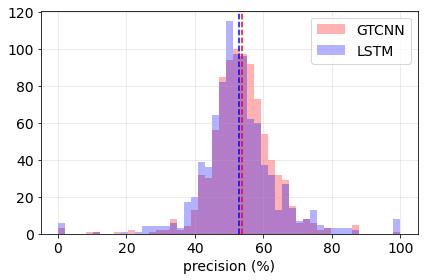



GTCNN | best | average recall | --> 0.552 (0.063)
LSTM | best | average recall | --> 0.529 (0.064)
Gap: 2.3
GTCNN > LSTM 29 times out of 45


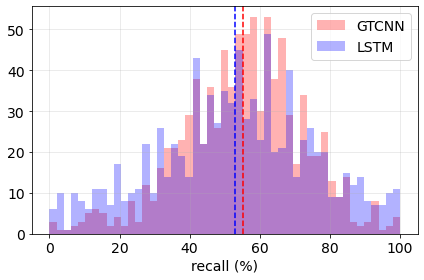



GTCNN | best | average f1 | --> 0.531 (0.05)
LSTM | best | average f1 | --> 0.502 (0.057)
Gap: 2.9000000000000004
GTCNN > LSTM 32 times out of 45


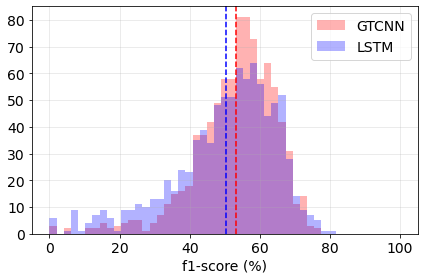

In [37]:
CATEGORY = 'best'
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    GTCNN_results = parse_results(GTCNN_results_folder, CATEGORY, metric)
    LSTM_results = parse_results(LSTM_results_folder, CATEGORY, metric)
    GRNN_results = parse_results(GRNN_results_folder, CATEGORY, metric)
    
    GTCNN_values = np.array([v for k,v in GTCNN_results.items()])
    GTCNN_mean_values = np.mean(GTCNN_values, axis=1)
    GTCNN_value = round(np.average(GTCNN_mean_values), 3)
    GTCNN_value_std = round(np.std(GTCNN_mean_values), 3)
    
    LSTM_values = np.array([v for k,v in LSTM_results.items()])
    LSTM_mean_values = np.mean(LSTM_values, axis=1)
    LSTM_value = round(np.average(LSTM_mean_values), 3)
    LSTM_value_std = round(np.std(LSTM_mean_values), 3)
    
    GRNN_values = np.array([v for k,v in GRNN_results.items()])
    GRNN_mean_values = np.mean(GRNN_values, axis=1)
    GRNN_value = round(np.average(GRNN_mean_values), 3)
    GRNN_value_std = round(np.std(GRNN_mean_values), 3)
    
    count = 0
    for idx in range(GTCNN_mean_values.shape[0]):
        if np.mean(GTCNN_values, axis=1)[idx] >  np.mean(LSTM_values, axis=1)[idx]:
            count += 1
            
    print(f"\n\nGTCNN | {CATEGORY} | average {metric} | --> {GTCNN_value} ({GTCNN_value_std})")
    print(f"LSTM | {CATEGORY} | average {metric} | --> {LSTM_value} ({LSTM_value_std})")
    print(f"Gap: {100*round(abs(GTCNN_value - LSTM_value), 3)}")
    print(f"GTCNN > LSTM {count} times out of 45")
    
    
            
    plt.figure(figsize=(6, 4))
    bins = np.linspace(0, 100, 50)
    plt.hist(100*GTCNN_values.flatten(), bins=bins, alpha=0.3, label='GTCNN', color='red')
    plt.axvline(x=np.mean(100*GTCNN_values.flatten()), color='red', linestyle='--')
    
    plt.hist(100*LSTM_values.flatten(), bins=bins,alpha=0.3, label='LSTM', color='blue')
    plt.axvline(x=np.mean(100*LSTM_values.flatten()), color='blue', linestyle='--')
    
#     plt.hist(100*GRNN_values.flatten(), bins=bins,alpha=0.3, label='GGRNN', color='green')
#     plt.axvline(x=np.mean(100*GRNN_values.flatten()), color='green', linestyle='--')
    
    plt.grid(alpha=0.3)
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel((metric if metric != "f1" else "f1-score")+" (%)", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
#     plt.savefig(f"{metric}_histogram_OAA.png")
    plt.show()
    


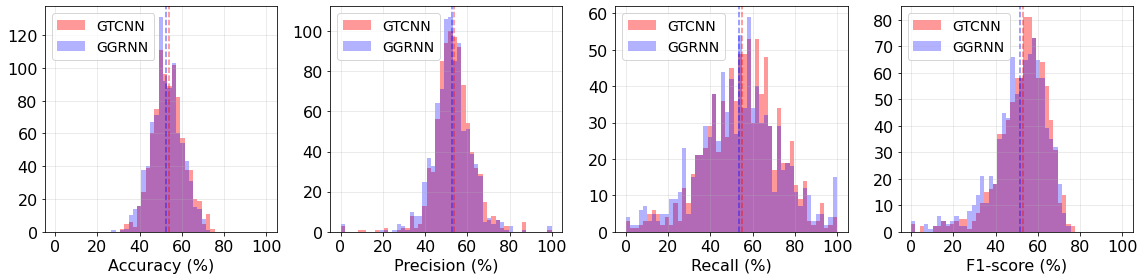

In [11]:
# all values

fig = plt.figure(figsize=(16, 4))

CATEGORY = 'best'

for idx, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
    
    plt.subplot(1, 4, idx+1)
    
    GTCNN_results = parse_results(GTCNN_results_folder, CATEGORY, metric)
    LSTM_results = parse_results(LSTM_results_folder, CATEGORY, metric)
    GRNN_results = parse_results(GRNN_results_folder, CATEGORY, metric)
    
    GTCNN_values = np.array([v for k,v in GTCNN_results.items()])
    GTCNN_mean_values = np.mean(GTCNN_values, axis=1)
    GTCNN_value = round(np.average(GTCNN_mean_values), 3)
    GTCNN_value_std = round(np.std(GTCNN_mean_values), 3)
    
    LSTM_values = np.array([v for k,v in LSTM_results.items()])
    LSTM_mean_values = np.mean(LSTM_values, axis=1)
    LSTM_value = round(np.average(LSTM_mean_values), 3)
    LSTM_value_std = round(np.std(LSTM_mean_values), 3)
    
    GRNN_values = np.array([v for k,v in GRNN_results.items()])
    GRNN_mean_values = np.mean(GRNN_values, axis=1)
    GRNN_value = round(np.average(GRNN_mean_values), 3)
    GRNN_value_std = round(np.std(GRNN_mean_values), 3)
    
   
            
    bins = np.linspace(0, 100, 50)
    plt.hist(100*GTCNN_values.flatten(), bins=bins, alpha=0.4, label='GTCNN', color='red')
    plt.axvline(x=np.mean(100*GTCNN_values.flatten()), color='red', linestyle='--', alpha=0.5)
    
#     plt.hist(100*LSTM_values.flatten(), bins=bins,alpha=0.3, label='LSTM', color='blue')
#     plt.axvline(x=np.mean(100*LSTM_values.flatten()), color='blue', linestyle='--', alpha=0.5)
    
    plt.hist(100*GRNN_values.flatten(), bins=bins,alpha=0.3, label='GGRNN', color='blue')
    plt.axvline(x=np.mean(100*GRNN_values.flatten()), color='blue', linestyle='--', alpha=0.5)
    
    plt.grid(alpha=0.3)
    plt.legend(loc='upper left', fontsize=14)
    plt.xlabel((metric.title() if metric != "f1" else "F1-score")+" (%)", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    

plt.tight_layout()   
# plt.savefig("histograms_OAA_GTCNN_GGRNN.pdf")
plt.show()

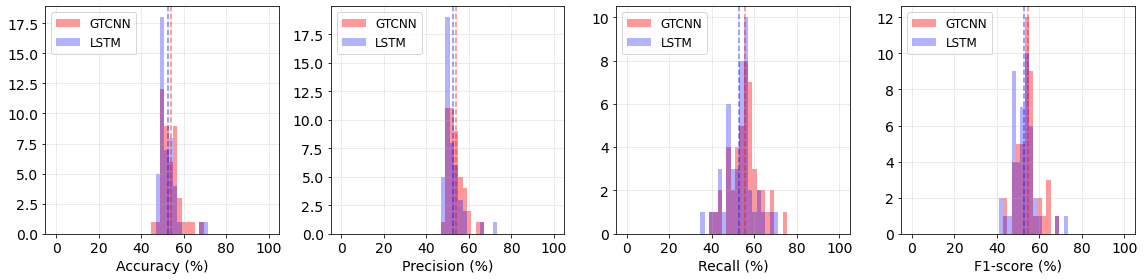

In [9]:
# # Medians

# fig = plt.figure(figsize=(16, 4))

# CATEGORY = 'best'

# for idx, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
    
#     plt.subplot(1, 4, idx+1)
    
#     GTCNN_results = parse_results(GTCNN_results_folder, CATEGORY, metric)
#     LSTM_results = parse_results(LSTM_results_folder, CATEGORY, metric)
#     GRNN_results = parse_results(GRNN_results_folder, CATEGORY, metric)
    
#     GTCNN_values = np.array([v for k,v in GTCNN_results.items()])
#     GTCNN_mean_values = np.median(GTCNN_values, axis=1)
#     GTCNN_value = round(np.average(GTCNN_mean_values), 3)
#     GTCNN_value_std = round(np.std(GTCNN_mean_values), 3)
    
#     LSTM_values = np.array([v for k,v in LSTM_results.items()])
#     LSTM_mean_values = np.median(LSTM_values, axis=1)
#     LSTM_value = round(np.average(LSTM_mean_values), 3)
#     LSTM_value_std = round(np.std(LSTM_mean_values), 3)
    
#     GRNN_values = np.array([v for k,v in GRNN_results.items()])
#     GRNN_mean_values = np.median(GRNN_values, axis=1)
#     GRNN_value = round(np.average(GRNN_mean_values), 3)
#     GRNN_value_std = round(np.std(GRNN_mean_values), 3)
    
   
            
#     bins = np.linspace(0, 100, 50)
#     plt.hist(100*GTCNN_mean_values.flatten(), bins=bins, alpha=0.4, label='GTCNN', color='red')
#     plt.axvline(x=np.mean(100*GTCNN_mean_values.flatten()), color='red', linestyle='--', alpha=0.5)
    
#     plt.hist(100*LSTM_mean_values.flatten(), bins=bins,alpha=0.3, label='LSTM', color='blue')
#     plt.axvline(x=np.mean(100*LSTM_mean_values.flatten()), color='blue', linestyle='--', alpha=0.5)
    
# #     plt.hist(100*GRNN_values.flatten(), bins=bins,alpha=0.3, label='GGRNN', color='blue')
# #     plt.axvline(x=np.mean(100*GRNN_values.flatten()), color='blue', linestyle='--', alpha=0.5)
    
#     plt.grid(alpha=0.3)
#     plt.legend(loc='upper left', fontsize=12)
#     plt.xlabel((metric.title() if metric != "f1" else "F1-score")+" (%)", fontsize=14)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.tight_layout()
    
    
# # plt.savefig("histograms_OAA.png")
# plt.show()